# 0. Run the backtest code

In [2]:
# Rb 5min test
# !python ../Main.py -o ../Results/Ru_10min_PriceThreshold_NoCost -c ../Config/Ru_10min_PriceThreshold_NoCost.json > /dev/null

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
# sys.path.append('/home/runmin/Documents/Qishi/QishiQR/BacktestEngine/Engine')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/Engine')

import matplotlib.pyplot as plt
from PostProcessing import GetResult
from PostProcessing import OffSetAverage

def PlotResult(TesterResults):
    for ID, tester in enumerate(TesterResults):
        print("Tester=",ID)
        
        params = tester["globalPara"]
        for key, item in tester["localPara"].items():
            print("{} = {}".format(key, item))

        fig, ax = plt.subplots(1,2,figsize=(20,6))
        tester["insample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[0])
        tester["insample"].plot(ax=ax[0])
        tester["outsample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[1])
        tester["outsample"].plot(ax=ax[1])
        
        ax[0].set_xlabel("Date")
        ax[0].set_title("Equity curve - Insample")
        ax[1].set_xlabel("Datae")
        ax[1].set_title("Equity curve - Outsample")
        plt.show()

    

# 1. Ru - 10min 

In [2]:
Ru_10min_result = GetResult("../Results/Ru_10min_PriceThreshold_NoCost/")


Tester= 0 |file_path =  ../Results/Ru_10min_PriceThreshold_NoCost/Result_0.pkl

Tester= 1 |file_path =  ../Results/Ru_10min_PriceThreshold_NoCost/Result_1.pkl

Tester= 2 |file_path =  ../Results/Ru_10min_PriceThreshold_NoCost/Result_2.pkl

Tester= 3 |file_path =  ../Results/Ru_10min_PriceThreshold_NoCost/Result_3.pkl

Tester= 4 |file_path =  ../Results/Ru_10min_PriceThreshold_NoCost/Result_4.pkl

Tester= 5 |file_path =  ../Results/Ru_10min_PriceThreshold_NoCost/Result_5.pkl

Tester= 6 |file_path =  ../Results/Ru_10min_PriceThreshold_NoCost/Result_6.pkl

Tester= 7 |file_path =  ../Results/Ru_10min_PriceThreshold_NoCost/Result_7.pkl

Tester= 8 |file_path =  ../Results/Ru_10min_PriceThreshold_NoCost/Result_8.pkl

Tester= 9 |file_path =  ../Results/Ru_10min_PriceThreshold_NoCost/Result_9.pkl

Tester= 10 |file_path =  ../Results/Ru_10min_PriceThreshold_NoCost/Result_10.pkl

Tester= 11 |file_path =  ../Results/Ru_10min_PriceThreshold_NoCost/Result_11.pkl

Tester= 12 |file_path =  ../Results

## 1.0 Rb - 10min offset average - group test results by price threshold

In [3]:
# len(Rb_5min_result)
# print(Rb_5min_result[0]['localPara'])
# Rb_5min_result[0]

In [3]:
NoCost_Result_Group = {10e-4:[],5e-4:[],0:[], 5:[], 10:[]}
FixedCost_Result_Group = {10e-4:[],5e-4:[],0:[]}

for result in Ru_10min_result:
    price_threshold = result['localPara']['price_threshold']
    if result['localPara']['fixed_cost']:
        FixedCost_Result_Group[price_threshold].append(result)
    else:
        NoCost_Result_Group[price_threshold].append(result)
    

---
# NO trading cost

## 1.1 Ru --- 10min offset average --- price threshold = 10bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

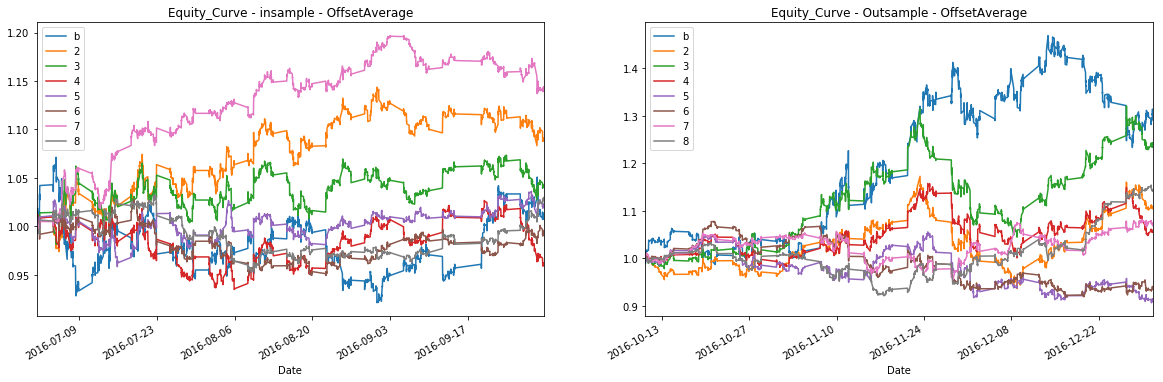

In [4]:
Ru_10min_Offset_Average_10bps = OffSetAverage(NoCost_Result_Group[10e-4])

Benchmark = Ru_10min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = Ru_10min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [5]:
Ru_10min_Offset_Average_10bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.280005,0.001447,-0.007680,NaN,-0.002469,-0.017119,0.035226,-0.086789,NaN,1.283045,518.4,1.089072,0.311399
1,0.280672,0.000741,-0.003998,0.006235,0.000089,-0.023003,0.046178,-0.118294,1.562110,0.746796,440.0,1.041343,0.393418
2,0.302119,-0.000527,-0.004124,0.005205,-0.000069,-0.022022,0.034909,-0.127907,1.263101,-0.407527,493.2,0.957943,0.425871
3,0.303797,0.000403,-0.004152,0.004992,0.000039,-0.026628,0.040480,-0.148780,1.203744,0.315471,502.8,1.019817,0.449621
4,0.292645,-0.000068,-0.004049,0.004457,-0.000008,-0.027397,0.032871,-0.173913,1.102889,-0.125476,555.0,0.987731,0.463962
5,0.298168,0.002148,-0.003982,0.004837,0.000262,-0.026552,0.038501,-0.122631,1.216374,1.789481,527.0,1.139188,0.471704
6,0.287451,0.000491,-0.004492,0.004902,0.000073,-0.034385,0.032133,-0.177578,1.095847,0.436317,452.4,1.025305,0.476738


In [6]:
Ru_10min_Offset_Average_10bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.451195,0.001918,-0.062608,NaN,-0.029502,-0.085125,0.060451,-0.266207,NaN,1.116418,568.0,1.121198,0.307403
1,0.422488,0.003806,-0.004680,0.007975,0.000364,-0.031862,0.071403,-0.219173,1.709507,2.227370,528.8,1.247134,0.398428
2,0.442688,0.001086,-0.004942,0.006655,0.000096,-0.038882,0.059992,-0.216237,1.354543,0.612529,610.6,1.067801,0.430955
3,0.459365,-0.001376,-0.005748,0.006624,-0.000134,-0.046032,0.051743,-0.267495,1.158784,-0.520176,551.0,0.918478,0.449162
4,0.409507,-0.000956,-0.005774,0.006198,-0.000105,-0.046254,0.050371,-0.243992,1.077528,-0.204705,563.0,0.954056,0.466397
5,0.420247,0.001214,-0.005610,0.006446,0.000128,-0.048085,0.046999,-0.198123,1.153908,0.735777,533.6,1.066586,0.469839
6,0.442720,0.002307,-0.006907,0.006898,0.000334,-0.049463,0.048009,-0.173953,1.001095,1.340278,421.8,1.130863,0.517225


## 2.2  Ru --- 10min offset average --- price threshold = 10

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

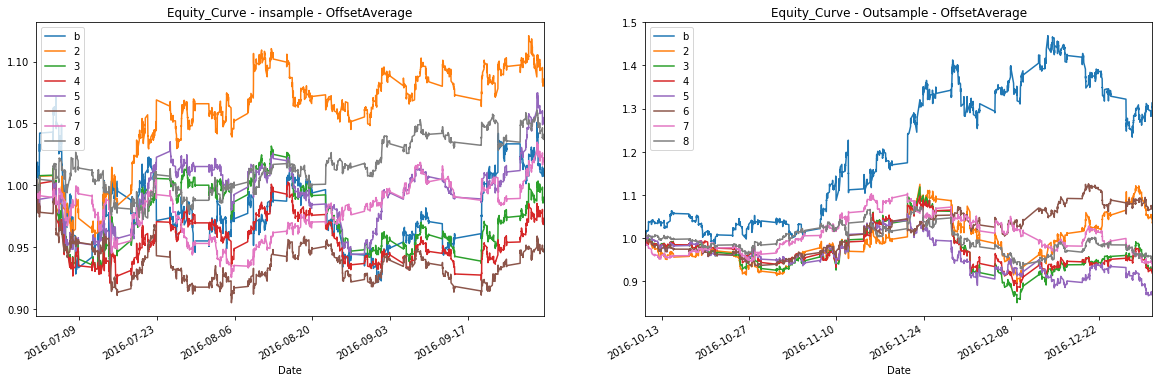

In [7]:
Ru_10min_Offset_Average_10d = OffSetAverage(NoCost_Result_Group[10])

Benchmark = Ru_10min_Offset_Average_10d.GetBenchmark()
AveEqCurve = Ru_10min_Offset_Average_10d.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [8]:
Ru_10min_Offset_Average_10d.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.285819,0.001374,-0.002446,0.003609,0.000082,-0.025076,0.031816,-0.083860,1.476752,1.219008,1066.4,1.081483,0.402670
1,0.287558,-0.000114,-0.002635,0.003334,-0.000007,-0.027051,0.031816,-0.149143,1.276632,-0.122584,1084.2,0.986201,0.421659
2,0.270113,-0.000408,-0.002663,0.003235,-0.000024,-0.027051,0.029722,-0.128467,1.226219,-0.400948,1121.0,0.964911,0.428269
3,0.265601,0.000906,-0.002789,0.003322,0.000057,-0.032596,0.032964,-0.138424,1.197775,0.737194,1063.2,1.055237,0.445102
4,0.268897,-0.000787,-0.002855,0.002996,-0.000043,-0.037064,0.024953,-0.169974,1.053222,-0.801587,1138.0,0.949692,0.457752
5,0.294894,0.000388,-0.002943,0.003135,0.000029,-0.036752,0.025651,-0.146955,1.066370,0.261508,1044.6,1.023288,0.469490
6,0.275205,0.000635,-0.002996,0.003131,0.000039,-0.030916,0.024913,-0.135618,1.048007,0.686946,1039.6,1.044635,0.476004


In [9]:
Ru_10min_Offset_Average_10d.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.454306,0.000863,-0.003436,0.005103,0.000051,-0.032574,0.066177,-0.207579,1.490856,0.461326,1005.6,1.032376,0.398479
1,0.432094,-0.001127,-0.003667,0.004674,-0.000066,-0.037471,0.057184,-0.253100,1.283576,-0.572258,1017.8,0.922367,0.418823
2,0.436990,-0.001242,-0.003743,0.004511,-0.000074,-0.040819,0.051639,-0.227441,1.214957,-0.649784,1058.6,0.912979,0.432585
3,0.405113,-0.002190,-0.004120,0.004662,-0.000131,-0.041359,0.050087,-0.234975,1.140562,-1.320858,1014.8,0.873774,0.440927
4,0.391163,0.001252,-0.004110,0.004390,0.000071,-0.047144,0.039536,-0.165372,1.069613,0.673738,1050.6,1.076516,0.478571
5,0.433993,-0.001026,-0.004307,0.004491,-0.000069,-0.040998,0.035916,-0.241682,1.045760,-0.610697,977.4,0.924443,0.470540
6,0.442519,-0.000803,-0.004251,0.004474,-0.000044,-0.035180,0.044890,-0.241076,1.053510,-0.303781,1006.0,0.944035,0.470908


## 2.3  Ru --- 10min offset average --- price threshold = 5bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

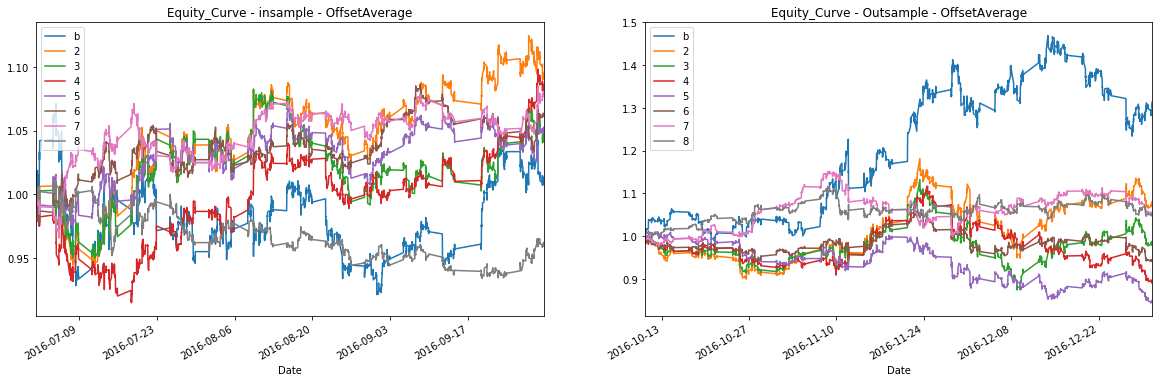

In [10]:
Ru_10min_Offset_Average_5bps = OffSetAverage(NoCost_Result_Group[5e-4])

Benchmark = Ru_10min_Offset_Average_5bps.GetBenchmark()
AveEqCurve = Ru_10min_Offset_Average_5bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [11]:
Ru_10min_Offset_Average_5bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.272818,0.001534,-0.002515,0.003796,0.000098,-0.025076,0.033885,-0.089432,1.512056,1.369867,1004.6,1.093047,0.400570
1,0.292235,0.000806,-0.002489,0.003618,0.000053,-0.025589,0.032929,-0.124116,1.457657,0.702518,1079.8,1.046893,0.400719
2,0.301669,0.001347,-0.002533,0.003186,0.000073,-0.025589,0.030531,-0.145042,1.260853,1.183358,1247.4,1.087966,0.435318
3,0.274838,0.000849,-0.002685,0.003284,0.000051,-0.023769,0.028023,-0.121034,1.224092,0.832470,1162.2,1.048425,0.437342
4,0.275513,0.000983,-0.002931,0.003247,0.000060,-0.028707,0.024917,-0.137133,1.112491,1.115815,1057.4,1.064316,0.464790
5,0.290827,0.001214,-0.003081,0.003398,0.000083,-0.028420,0.027893,-0.156705,1.105281,0.999070,922.6,1.073660,0.471916
6,0.290262,-0.000574,-0.003685,0.003672,-0.000049,-0.034497,0.027592,-0.154614,0.997049,-0.473506,728.0,0.961550,0.479903


In [12]:
Ru_10min_Offset_Average_5bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.461039,0.001448,-0.003455,0.005322,0.000090,-0.032574,0.073418,-0.208795,1.544511,0.759709,963.8,1.072618,0.394892
1,0.446759,-0.000050,-0.003453,0.005022,0.000006,-0.032574,0.064537,-0.242011,1.460396,-0.114253,1017.8,0.991675,0.398402
2,0.428812,-0.001771,-0.003660,0.004377,-0.000082,-0.037036,0.043177,-0.259232,1.200991,-1.167682,1188.2,0.894957,0.433638
3,0.410293,-0.002602,-0.003970,0.004503,-0.000136,-0.036809,0.044069,-0.294769,1.136207,-1.665518,1091.8,0.852774,0.441116
4,0.405669,-0.000853,-0.004348,0.004428,-0.000052,-0.043367,0.034592,-0.209888,1.018591,-0.510534,1008.6,0.935119,0.475572
5,0.444918,0.000904,-0.004511,0.004766,0.000062,-0.036080,0.035684,-0.232175,1.056601,0.513291,911.6,1.037357,0.483454
6,0.454111,0.000874,-0.005150,0.005404,0.000074,-0.049366,0.050732,-0.218455,1.048711,0.495335,730.2,1.033161,0.485988


## 2.4  Ru --- 10min offset average --- price threshold = 5

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

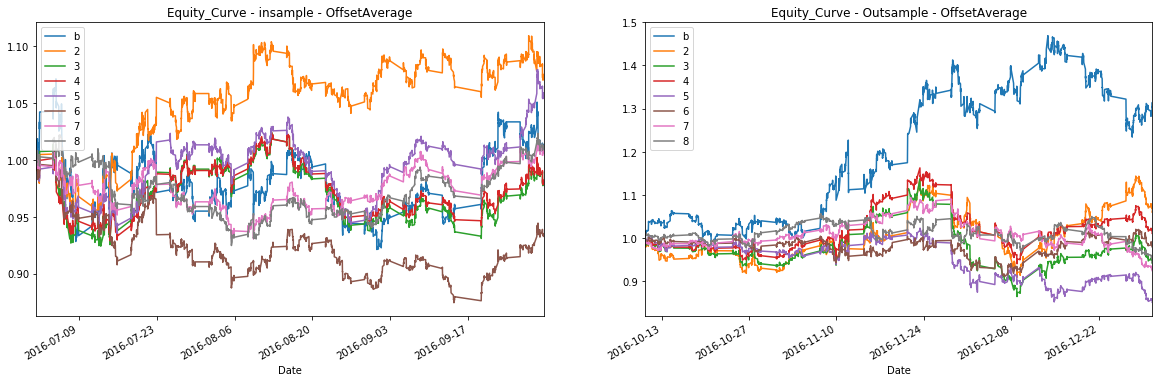

In [13]:
Ru_10min_Offset_Average_5d = OffSetAverage(NoCost_Result_Group[5])

Benchmark = Ru_10min_Offset_Average_5d.GetBenchmark()
AveEqCurve = Ru_10min_Offset_Average_5d.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [14]:
Ru_10min_Offset_Average_5d.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.283516,0.001215,-0.002453,0.003597,0.000073,-0.025076,0.031816,-0.086188,1.468093,1.076467,1069.0,1.070901,0.402044
1,0.280488,-0.000246,-0.002650,0.003313,-0.000015,-0.027051,0.031816,-0.152212,1.261736,-0.212006,1083.0,0.977042,0.422235
2,0.264932,-0.000246,-0.002714,0.003304,-0.000015,-0.027051,0.029495,-0.137666,1.236748,-0.273172,1069.4,0.976271,0.429521
3,0.270386,0.000948,-0.002663,0.003148,0.000046,-0.030772,0.029188,-0.139937,1.186100,0.786459,1178.0,1.056552,0.444451
4,0.280525,-0.001013,-0.002923,0.003056,-0.000064,-0.033186,0.024098,-0.188234,1.050177,-0.963462,1109.4,0.933639,0.455297
5,0.278492,0.000162,-0.002899,0.003179,0.000013,-0.032709,0.024909,-0.127065,1.097933,0.199671,1074.6,1.003911,0.458957
6,0.265602,0.000229,-0.003020,0.003113,0.000018,-0.033720,0.023492,-0.161311,1.031121,0.274220,1032.4,1.018237,0.475468


In [15]:
Ru_10min_Offset_Average_5d.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.460009,0.001254,-0.003399,0.005136,0.000075,-0.032574,0.067323,-0.203424,1.515296,0.685907,1003.0,1.056358,0.396952
1,0.429698,-0.000786,-0.003665,0.004695,-0.000047,-0.037471,0.058330,-0.247359,1.289094,-0.386771,1015.8,0.938376,0.419642
2,0.437174,0.000353,-0.003715,0.004721,0.000021,-0.039806,0.052786,-0.213861,1.286041,0.259413,1009.0,1.002777,0.431187
3,0.403355,-0.002518,-0.003852,0.004462,-0.000140,-0.038797,0.044996,-0.248822,1.162362,-1.654805,1117.6,0.849968,0.433088
4,0.359965,-0.000212,-0.004262,0.004396,-0.000021,-0.040909,0.041638,-0.208056,1.035389,-0.129217,1028.6,0.974048,0.477725
5,0.408240,-0.001196,-0.004193,0.004368,-0.000068,-0.036943,0.045992,-0.228747,1.041118,-0.680636,1022.2,0.914585,0.470343
6,0.435358,-0.000852,-0.004351,0.004594,-0.000052,-0.036552,0.048943,-0.239443,1.057594,-0.464796,979.6,0.935702,0.470307


## 2.5  Ru --- 10min offset average --- price threshold = 0

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

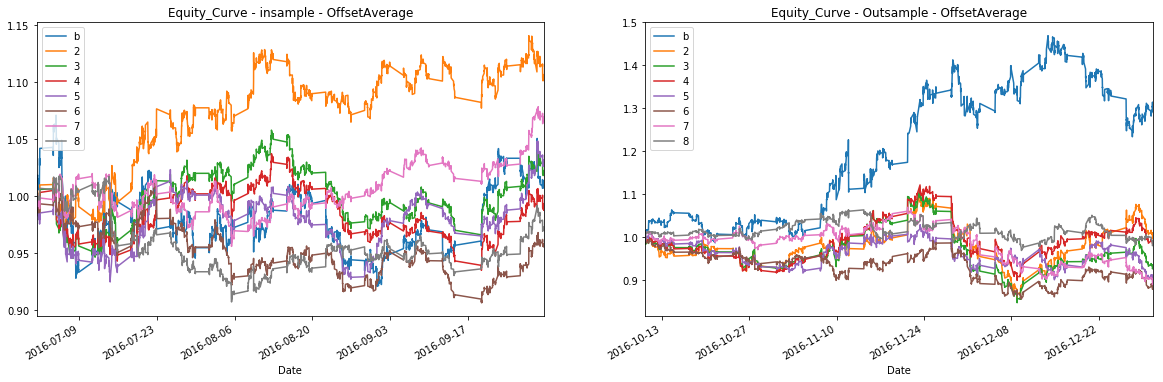

In [16]:
Ru_10min_Offset_Average_0bps = OffSetAverage(NoCost_Result_Group[0e-4])

Benchmark = Ru_10min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Ru_10min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [17]:
Ru_10min_Offset_Average_0bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.278475,0.001664,-0.002454,0.003615,0.000100,-0.025076,0.031816,-0.077951,1.474320,1.500203,1066.8,1.101561,0.405127
1,0.275516,0.000381,-0.002632,0.003361,0.000023,-0.027051,0.031816,-0.131116,1.292148,0.350891,1066.6,1.017528,0.423715
2,0.256890,-0.000110,-0.002676,0.003242,-0.000009,-0.027051,0.029722,-0.125926,1.223227,-0.117750,1117.4,0.983363,0.432761
3,0.259439,0.000573,-0.002775,0.003220,0.000033,-0.030844,0.028827,-0.143295,1.163958,0.519545,1100.2,1.029776,0.446837
4,0.269761,-0.000635,-0.002898,0.003154,-0.000040,-0.033145,0.023962,-0.175223,1.093363,-0.595414,1089.8,0.955106,0.451117
5,0.292976,0.001116,-0.002898,0.003177,0.000069,-0.035065,0.024082,-0.129786,1.097712,1.006915,1087.0,1.066582,0.468663
6,0.296358,-0.000383,-0.002925,0.003032,-0.000021,-0.033495,0.023259,-0.152842,1.041167,-0.320883,1110.8,0.976674,0.468504


In [18]:
Ru_10min_Offset_Average_0bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.435351,0.000253,-0.003428,0.005035,0.000014,-0.032574,0.065547,-0.226499,1.474046,0.142284,1012.2,0.996481,0.396872
1,0.434250,-0.001034,-0.003643,0.004720,-0.000062,-0.037471,0.058330,-0.252531,1.303511,-0.537318,1011.0,0.923893,0.416189
2,0.439519,-0.000062,-0.003747,0.004701,-0.000003,-0.044910,0.056850,-0.225974,1.260012,-0.044592,1049.0,0.974469,0.433201
3,0.404961,-0.001481,-0.004084,0.004646,-0.000088,-0.049118,0.049763,-0.221849,1.145245,-0.840479,1030.4,0.910206,0.444923
4,0.405923,-0.001976,-0.004332,0.004460,-0.000125,-0.046092,0.043482,-0.236002,1.033107,-1.160902,1017.0,0.874992,0.467365
5,0.426084,-0.001789,-0.004271,0.004371,-0.000109,-0.036086,0.033353,-0.266421,1.025636,-0.985322,1023.8,0.901859,0.469686
6,0.421632,-0.000202,-0.004198,0.004459,-0.000010,-0.041649,0.045390,-0.230662,1.067287,-0.067118,1035.6,0.990533,0.473028
